## Import Libraries
_____
 - Numpy library is used in Math & Statistics .
 - Pandas library is used to read Data .
 - Matpltlib library is used to plotting .
 - Seaborn library is used to Graph datasets .

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data by Pandas library
____

In [ ]:
data = pd.read_csv("C:/Users/HP/Documents/data.csv")

data.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,11/01/2023,25.40,25.80,25.98,25.35,2.90K,-2.08%
1,10/31/2023,25.94,26.00,26.00,25.27,0.84K,1.49%
2,10/30/2023,25.56,26.00,26.25,25.22,10.22K,-1.69%
3,10/29/2023,26.00,25.66,26.10,25.51,13.89K,1.52%


In [ ]:
data.tail(4)

,Date,Price,Open,High,Low,Vol.,Change %
1173,01/21/2015,10.58,10.45,10.73,10.40,303.48K,0.67%
1174,01/20/2015,10.51,10.45,10.60,10.35,430.66K,3.04%
1175,01/19/2015,10.20,10.20,10.42,10.06,245.18K,-0.20%
1176,01/18/2015,10.22,10.33,10.36,10.15,326.41K,-1.73%


## Data Cleaning
___

In [ ]:
data.shape

(1177, 7)

In [ ]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_15288\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Open,High,Low
Price,1.000000,0.994868,0.994099,0.996266
Open,0.994868,1.000000,0.997584,0.996750
High,0.994099,0.997584,1.000000,0.995027
Low,0.996266,0.996750,0.995027,1.000000


In [ ]:
data.describe()

,Price,Open,High,Low
count,1177.000000,1177.000000,1177.000000,1177.000000
mean,12.817570,12.893347,13.028411,12.701623
std,3.811245,3.838890,3.902807,3.749663
min,6.250000,6.090000,6.090000,6.090000
25%,10.450000,10.490000,10.650000,10.350000
50%,11.900000,11.990000,12.070000,11.810000
75%,15.000000,15.000000,15.000000,15.000000
max,26.000000,26.000000,26.250000,25.510000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1177 non-null   object 
 1   Price     1177 non-null   float64
 2   Open      1177 non-null   float64
 3   High      1177 non-null   float64
 4   Low       1177 non-null   float64
 5   Vol.      1177 non-null   object 
 6   Change %  1177 non-null   object 
dtypes: float64(4), object(3)
memory usage: 64.5+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_15288\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

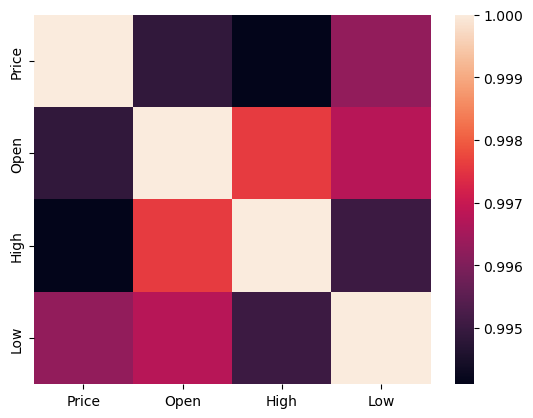

In [ ]:
sns.heatmap(data.corr())

### Convert Date From Object (string) Datatype To Datetime DataType
____

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

### Sort_Values ( Date )
____

In [ ]:
data.sort_values(by='Date', ascending=False,ignore_index=False,inplace=True)


### Make The Date Column As Index
____

In [ ]:
data.index=data['Date']
data.drop(columns='Date',inplace=True)

In [ ]:
data.head(4)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-11-01,25.40,25.80,25.98,25.35,2.90K,-2.08%
2023-10-31,25.94,26.00,26.00,25.27,0.84K,1.49%
2023-10-30,25.56,26.00,26.25,25.22,10.22K,-1.69%
2023-10-29,26.00,25.66,26.10,25.51,13.89K,1.52%


### Convert Val Cloumn From Object (string) DataType To Float DataType
___

In [ ]:
def convert_value(val):
    if isinstance(val, str):
        if 'B' in val:
            return float(val.replace('B', '')) * 1000000000
        elif 'M' in val:
            return float(val.replace('M', '')) * 1000000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1000
    return float(val)
# Apply the function to the column
data['Vol.'] = data['Vol.'].apply(convert_value)

### Convert Change Cloumn From Object (string) DataType To Float DataType
____

In [ ]:
def convert_value(change):
    if isinstance(change, str):
        if '%' in change:
            return float(change.replace('%', ''))
data['Change %'] = data['Change %'].apply(convert_value)

### Check if data contain null values
____

In [ ]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
data.head(4)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-11-01,25.40,25.80,25.98,25.35,2900.0,-2.08
2023-10-31,25.94,26.00,26.00,25.27,840.0,1.49
2023-10-30,25.56,26.00,26.25,25.22,10220.0,-1.69
2023-10-29,26.00,25.66,26.10,25.51,13890.0,1.52


## Data Visulaization
___

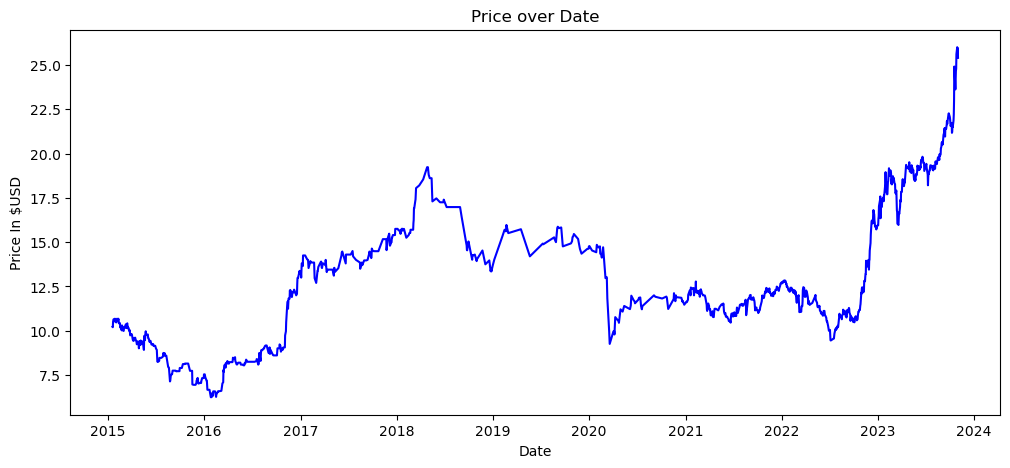

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['Price'],color='b')
plt.title("Price over Date")
plt.xlabel("Date")
plt.ylabel("Price In $USD")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15288\3781081695.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  plt.plot(data['Price'].loc['2020-03-23 00:00:00':],color='k')


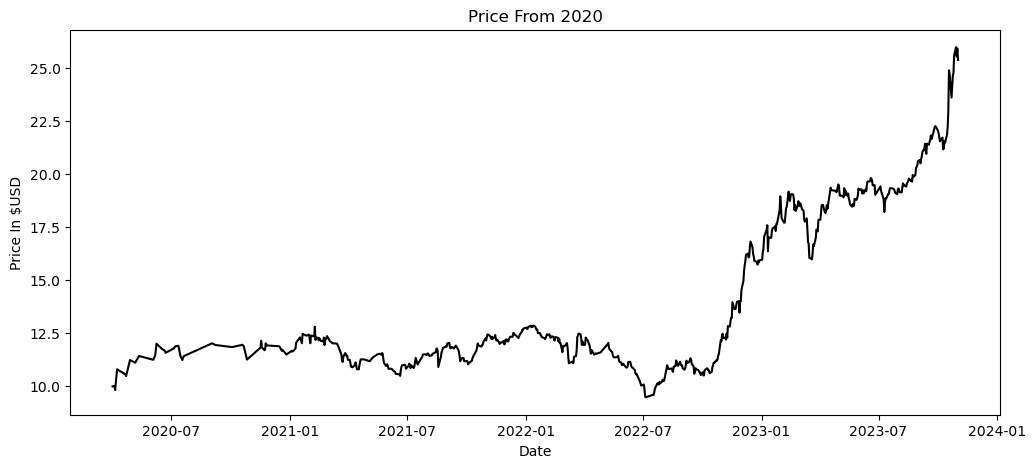

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['Price'].loc['2020-03-23 00:00:00':],color='k')
plt.title("Price From 2020")
plt.xlabel("Date")
plt.ylabel("Price In $USD")
plt.show()

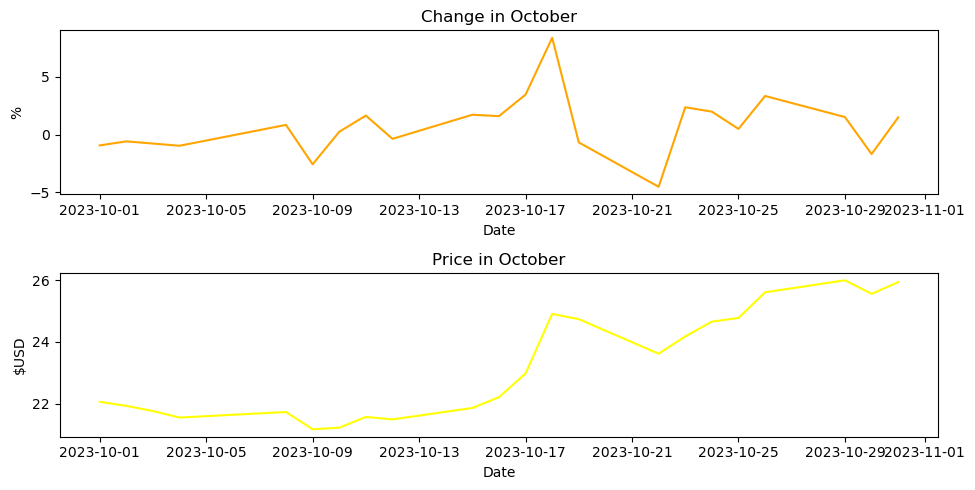

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))

axs[0].plot(data['Change %'].loc['2023-10'],color='orange')
axs[0].set_title("Change in October")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("%")

axs[1].plot(data['Price'].loc['2023-10'],color='yellow')
axs[1].set_title("Price in October")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("$USD")

plt.tight_layout()
plt.show()

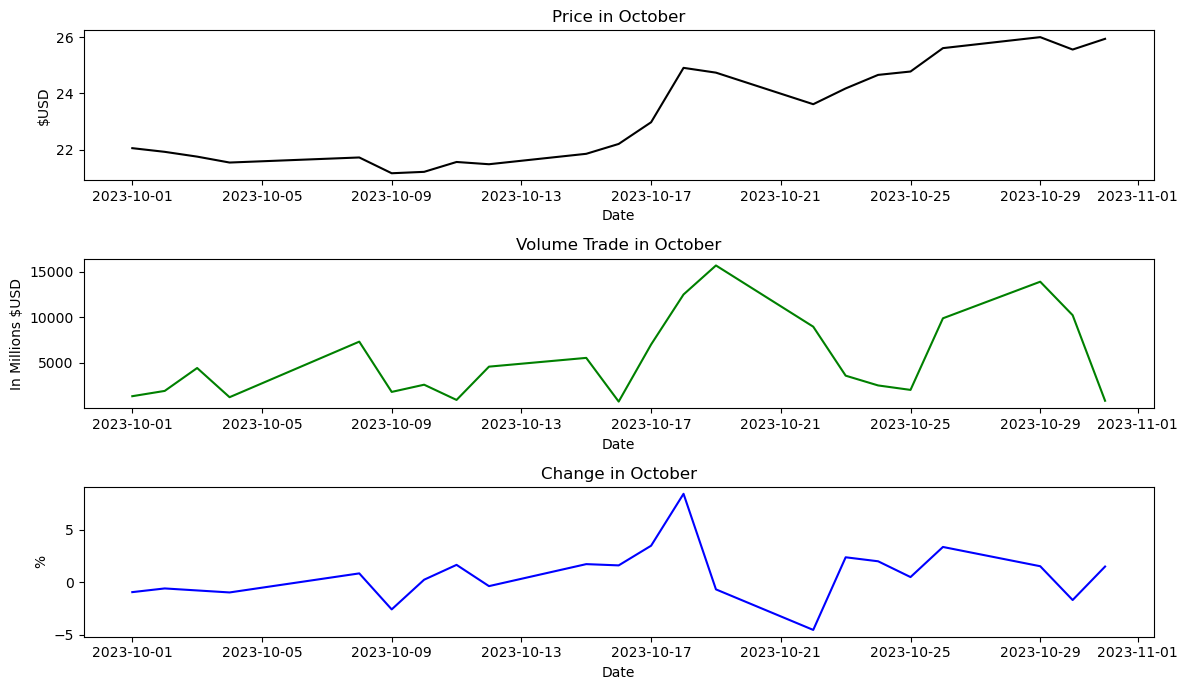

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 7))


axs[0].plot(data['Price'].loc['2023-10'], color='k')
axs[0].set_title("Price in October")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("$USD")


axs[1].plot(data['Vol.'].loc['2023-10'], color='g')
axs[1].set_title("Volume Trade in October")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("In Millions $USD")


axs[2].plot(data['Change %'].loc['2023-10'], color='b')
axs[2].set_title("Change in October")
axs[2].set_xlabel("Date")
axs[2].set_ylabel("%")

plt.tight_layout()
plt.show()


## Thank you !!